In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Number of ham and spam messages')

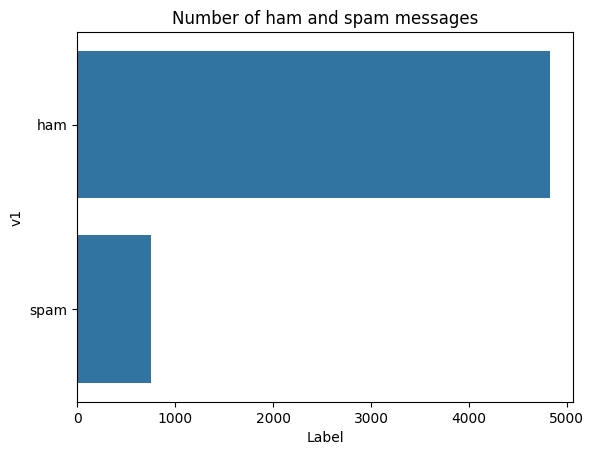

In [ ]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')


In [ ]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)


In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model


In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 150, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.8234 - loss: 0.4751 - val_accuracy: 0.9251 - val_loss: 0.2145
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.9396 - loss: 0.2029 - val_accuracy: 0.9831 - val_loss: 0.0897
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.9701 - loss: 0.1088 - val_accuracy: 0.9831 - val_loss: 0.0644
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.9834 - loss: 0.0604 - val_accuracy: 0.9852 - val_loss: 0.0531
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.9890 - loss: 0.0463 - val_accuracy: 0.9852 - val_loss: 0.0483
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.9906 - loss: 0.0364 - val_accuracy: 0.9831 - val_loss: 0.0454
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9907 - loss: 0.0376 - val_accuracy: 0.9821 - val_loss: 0.0443
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - accuracy: 0.9922 - loss: 0.0276 - val_accuracy: 0

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9983 - loss: 0.0234


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


Test set
  Loss: 0.026
  Accuracy: 0.995


In [ ]:
def predict_spam(text):
    txts = tok.texts_to_sequences([text])
    txts = sequence.pad_sequences(txts, maxlen=max_len)
    preds = model.predict(txts)
    return "spam" if preds[0][0] > 0.5 else "ham"
texts = [
    "Congratulations! You’ve won a free iPhone. Click here to claim your prize now!",
    "Urgent! Update your bank details to avoid account suspension.",
    "Hey, are we still on for dinner tonight?",
    "Don’t forget to submit your assignment before 5 PM.",
    "You’ve been selected for a $500 Amazon voucher. Claim immediately!",
    "Meeting rescheduled to 10 AM tomorrow in Conference Room B.",
]

for t in texts:
    print(f"{t}\n → Predicted: {predict_spam(t)}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Congratulations! You’ve won a free iPhone. Click here to claim your prize now!
 → Predicted: spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Urgent! Update your bank details to avoid account suspension.
 → Predicted: spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Hey, are we still on for dinner tonight?
 → Predicted: ham

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Don’t forget to submit your assignment before 5 PM.
 → Predicted: spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
You’ve been selected for a $500 Amazon voucher. Claim immediately!
 → Predicted: spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Meeting rescheduled to 10 AM tomorrow in Conference Room B.
 → Predicted: ham



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 150, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - accuracy: 0.8172 - loss: 0.4923 - val_accuracy: 0.9357 - val_loss: 0.1999
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.9419 - loss: 0.2121 - val_accuracy: 0.9831 - val_loss: 0.0873
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.9729 - loss: 0.1092 - val_accuracy: 0.9895 - val_loss: 0.0458
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.9820 - loss: 0.0654 - val_accuracy: 0.9863 - val_loss: 0.0393
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - accuracy: 0.9838 - loss: 0.0564 - val_accuracy: 0.9842 - val_loss: 0.0402
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9849 - loss: 0.0457
Test set
  Loss: 0.050
  Accuracy: 0.987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Congratulations! You’ve won a free iPhone. Click here to claim your prize now!
 → Predicted: spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Urgent! Update your bank details to avoid account suspension.
 → Pre

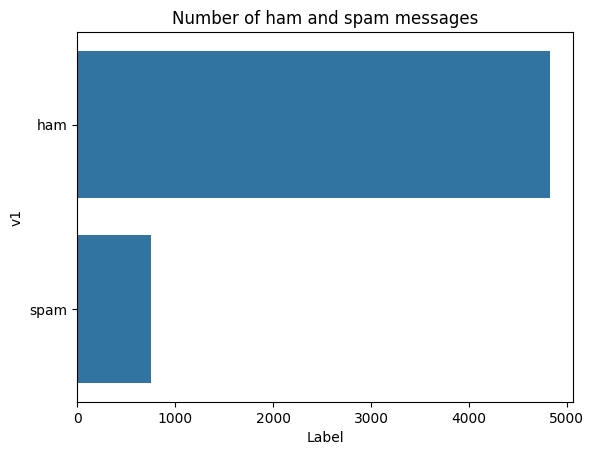

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

accr = model.evaluate(test_sequences_matrix,Y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

def predict_spam(text):
    txts = tok.texts_to_sequences([text])
    txts = sequence.pad_sequences(txts, maxlen=max_len)
    preds = model.predict(txts)
    return "spam" if preds[0][0] > 0.8 else "ham"
texts = [
    "Congratulations! You’ve won a free iPhone. Click here to claim your prize now!",
    "Urgent! Update your bank details to avoid account suspension.",
    "Hey, are we still on for dinner tonight?",
    "Don’t forget to submit your assignment before 5 PM.",
    "You’ve been selected for a $500 Amazon voucher. Claim immediately!",
    "Meeting rescheduled to 10 AM tomorrow in Conference Room B.",
]

for t in texts:
    print(f"{t}\n → Predicted: {predict_spam(t)}\n")
